In [2]:
import pandas as pd
from tabulate import tabulate

df_check = pd.read_csv('prices_round_4_day_2.csv', delimiter=';')
df_observ = pd.read_csv('observations_round_4_day_2.csv', delimiter=',')

print(tabulate(df_observ, headers='keys'))

        timestamp    bidPrice    askPrice    transportFees    exportTariff    importTariff    sugarPrice    sunlightIndex
----  -----------  ----------  ----------  ---------------  --------------  --------------  ------------  ---------------
   0            0       657         658.5              1.4            10.5            -4         209                65
   1          100       660.5       662                1.4            10.5            -4         209.299            65
   2          200       664         665.5              1.4            10.5            -4         209.467            65
   3          300       669         670.5              1.4            10.5            -4         209.526            65
   4          400       673.5       675                1.4            10.5            -4         209.597            65
   5          500       672.5       674                1.4            10.5            -4         209.667            65.01
   6          600       669.5       671

In [3]:
import matplotlib.pyplot as plt

df = {}
products =["MAGNIFICENT_MACARONS"]

for prod in products:
    df[prod] = df_check[df_check['product'] == prod]

df_mac = df['MAGNIFICENT_MACARONS']
df_sugar = df_observ["sugarPrice"]
df_sun = df_observ["sunlightIndex"]

In [4]:
# Compute all the weighted mid prices

import numpy as np
import math

bid_price_1 = {}
bid_volume_1 = {}
bid_price_2 = {}
bid_volume_2 = {}
bid_price_3 = {}
bid_volume_3 = {}
ask_price_1 = {}
ask_volume_1 = {}
ask_price_2 = {}
ask_volume_2 = {}
ask_price_3 = {}
ask_volume_3 = {}

products =["MAGNIFICENT_MACARONS"]

for prod in products:
    bid_price_1[prod] = list(df[prod]['bid_price_1'])
    bid_volume_1[prod] = list(df[prod]['bid_volume_1'])
    bid_price_2[prod] = list(df[prod]['bid_price_2'])
    bid_volume_2[prod] = list(df[prod]['bid_volume_2'])
    bid_price_3[prod] = list(df[prod]['bid_price_3'])
    bid_volume_3[prod] = list(df[prod]['bid_volume_3'])

    ask_price_1[prod] = list(df[prod]['ask_price_1'])
    ask_volume_1[prod] = list(df[prod]['ask_volume_1'])
    ask_price_2[prod] = list(df[prod]['ask_price_2'])
    ask_volume_2[prod] = list(df[prod]['ask_volume_2'])
    ask_price_3[prod] = list(df[prod]['ask_price_3'])
    ask_volume_3[prod] = list(df[prod]['ask_volume_3'])

mid_weight = {}

for prod in products:
    mid_weight[prod] = []

    for i in range(len(bid_price_1[prod])):
        total_weight = 0
        mid_weight_curr = 0
        if not math.isnan(bid_price_1[prod][i]):
            mid_weight_curr += bid_price_1[prod][i] * bid_volume_1[prod][i]
            total_weight += bid_volume_1[prod][i]
    
        if not math.isnan(bid_price_2[prod][i]):
            mid_weight_curr += bid_price_2[prod][i] * bid_volume_2[prod][i]
            total_weight += bid_volume_2[prod][i]
    
        if not math.isnan(bid_price_3[prod][i]):
            mid_weight_curr += bid_price_3[prod][i] * bid_volume_3[prod][i]
            total_weight += bid_volume_3[prod][i]

        if not math.isnan(ask_price_1[prod][i]):
            mid_weight_curr += ask_price_1[prod][i] * ask_volume_1[prod][i]
            total_weight += ask_volume_1[prod][i]
    
        if not math.isnan(ask_price_2[prod][i]):
            mid_weight_curr += ask_price_2[prod][i] * ask_volume_2[prod][i]
            total_weight += ask_volume_2[prod][i]
    
        if not math.isnan(ask_price_3[prod][i]):
            mid_weight_curr += ask_price_3[prod][i] * ask_volume_3[prod][i]
            total_weight += ask_volume_3[prod][i]

        mid_weight[prod].append(mid_weight_curr / total_weight if total_weight != 0 else 0)
    


C:\Users\amino\AppData\Local\Temp\ipykernel_18472\2888823482.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


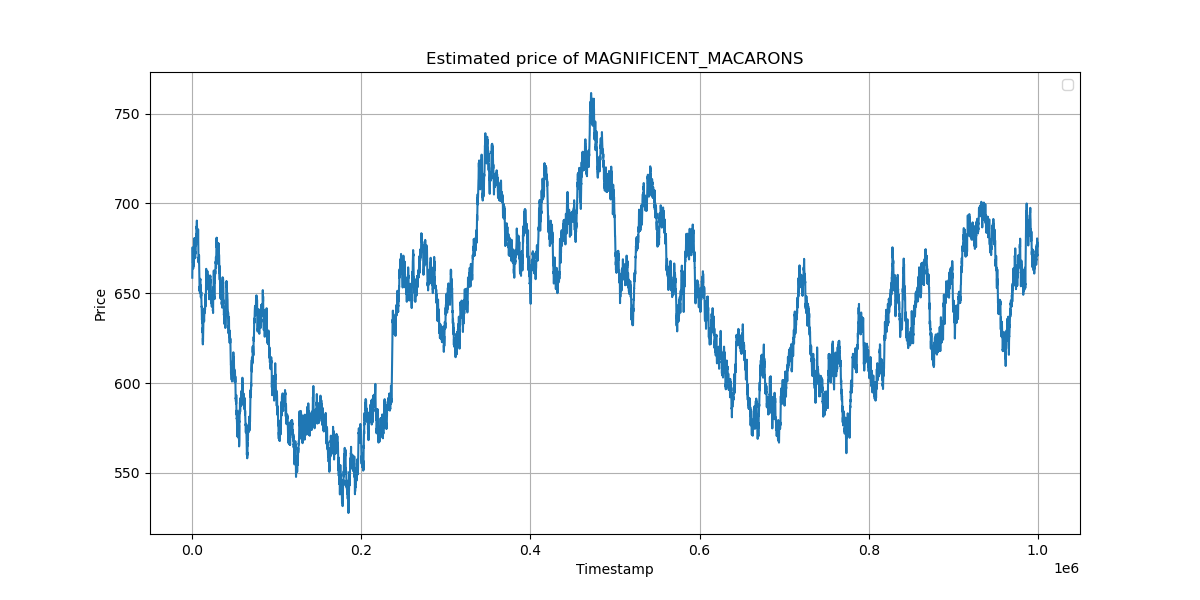

C:\Users\amino\AppData\Local\Temp\ipykernel_18472\2888823482.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


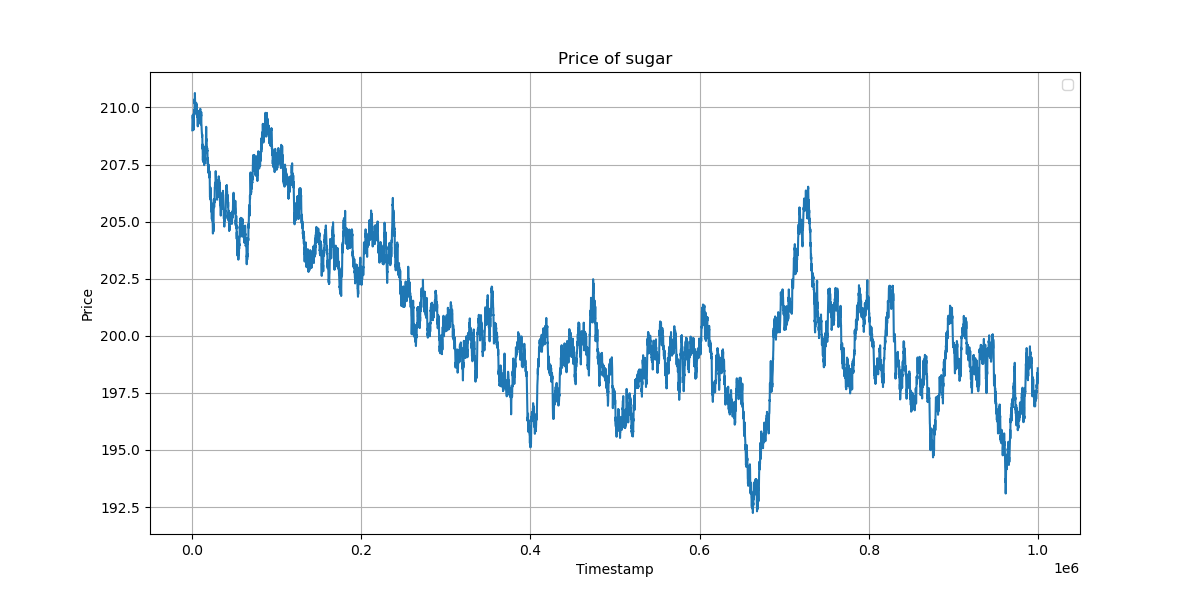

C:\Users\amino\AppData\Local\Temp\ipykernel_18472\2888823482.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


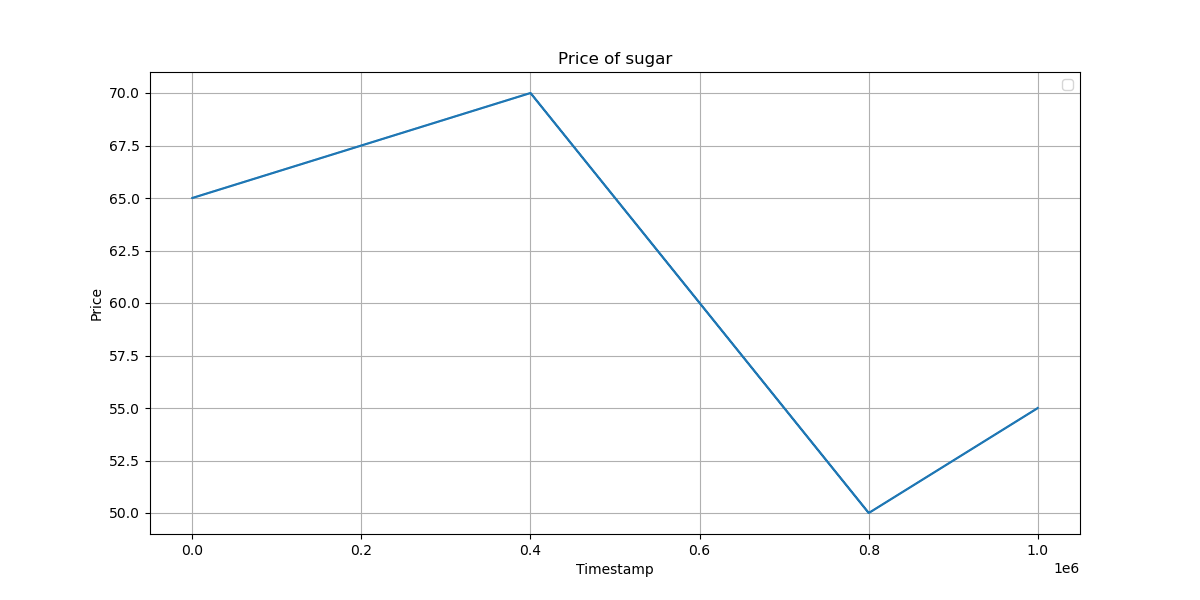

In [5]:
%matplotlib ipympl
import matplotlib.pyplot as plt

time = list(df_mac['timestamp'])


for prod in products:
    plt.figure(figsize=(12, 6))
    plt.plot(time, mid_weight[prod])
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
    plt.title('Estimated price of ' + prod)
    plt.legend()
    plt.grid(True)
    #plt.xlim([800000,1000000])
    plt.show()

sugar_lst = list(df_observ["sugarPrice"])
sun_lst = list(df_observ["sunlightIndex"])

plt.figure(figsize=(12, 6))
plt.plot(time, sugar_lst)
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price of sugar')
plt.legend()
plt.grid(True)
#plt.xlim([800000,1000000])
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(time, sun_lst)
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price of sugar')
plt.legend()
plt.grid(True)
#plt.xlim([800000,1000000])
plt.show()

MAGNIFICENT_MACARONS Intercept: 1387.5340678486073
MAGNIFICENT_MACARONS Coefficient: [-3.72875112]
MAGNIFICENT_MACARONS root of MSE:  43.380253026242634


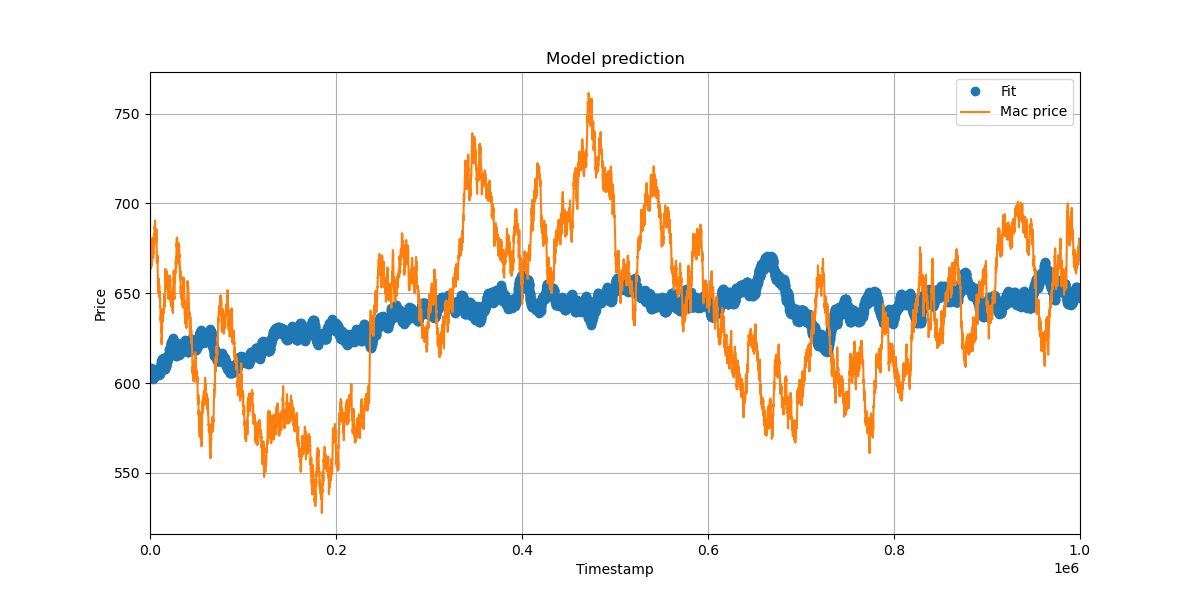

In [ ]:
%matplotlib ipympl
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

products =["MAGNIFICENT_MACARONS"]

time_lst = list(df_mac['timestamp'])
sugar_lst = list(df_observ["sugarPrice"])
sun_lst = list(df_observ["sunlightIndex"])

mac_mprice = mid_weight["MAGNIFICENT_MACARONS"]

shift = 0


intercepts = {}
coeffs = {}

# Linear Regression model
model = LinearRegression()

Vars = []
y = []
time = []

for i in range(shift,len(mac_mprice)):
    #Vars.append([sugar_lst[i -shift], sun_lst[i-shift], sun_lst[i-shift] * sugar_lst[i-shift]])
    Vars.append([sugar_lst[i -shift]])
    y.append(mac_mprice[i])
    time.append(time_lst[i])

X = np.array(Vars)

# Fitting the model
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

intercept = model.intercept_
coeffs = model.coef_

# Coefficients and intercept
print(prod + " Intercept:", intercept)
print(products[0] + " Coefficient:", coeffs)

print(prod + " root of MSE: ",math.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(12, 6))
plt.plot(time, y_pred,'o',label = 'Fit')
plt.plot(time, y, label = 'Mac price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Model prediction')
plt.legend()
plt.grid(True)
plt.xlim(0,10 ** 6)
plt.show()

MAGNIFICENT_MACARONS Intercept: 639.6013433160929
MAGNIFICENT_MACARONS Coefficient: [0.]
MAGNIFICENT_MACARONS root of MSE:  45.2276612135987


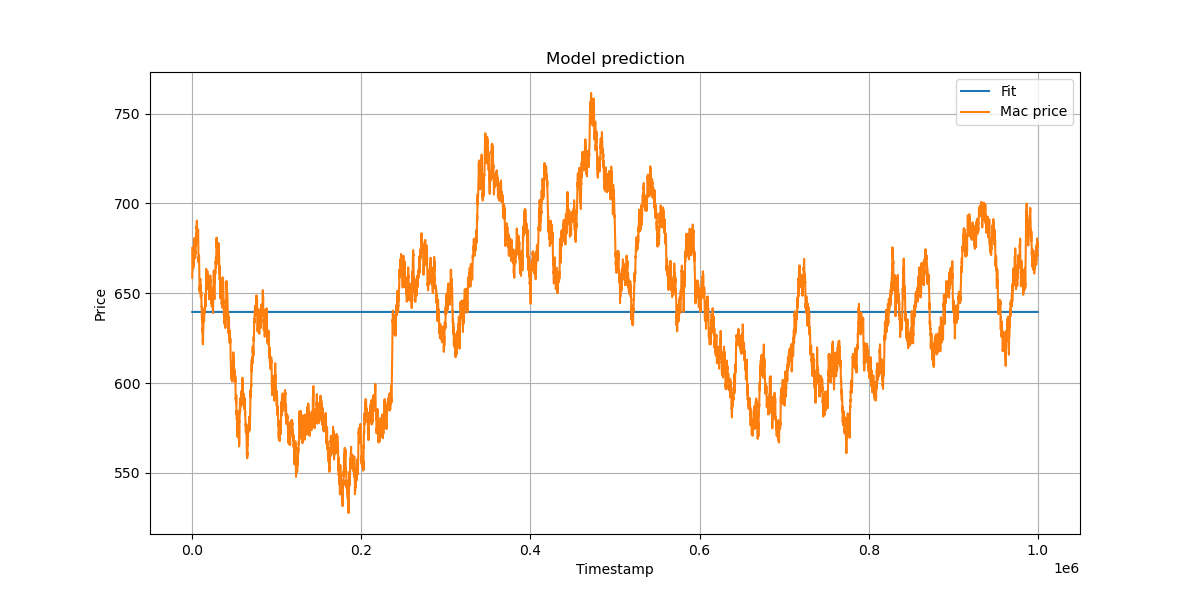

In [11]:
# Linear Regression model
model = LinearRegression()

shift = 50
Vars = []
y = []
time = []

for i in range(0,len(mac_mprice)):
    #Vars.append([sugar_lst[i -shift], sun_lst[i-shift], sun_lst[i-shift] * sugar_lst[i-shift]])
    Vars.append([1])
    y.append(mac_mprice[i])
    time.append(time_lst[i])

X = np.array(Vars)

# Fitting the model
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

intercept = model.intercept_
coeffs = model.coef_

# Coefficients and intercept
print(prod + " Intercept:", intercept)
print(products[0] + " Coefficient:", coeffs)

print(prod + " root of MSE: ",math.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(12, 6))
plt.plot(time, y_pred, label = 'Fit')
plt.plot(time, y, label = 'Mac price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Model prediction')
plt.legend()
plt.grid(True)
plt.show()

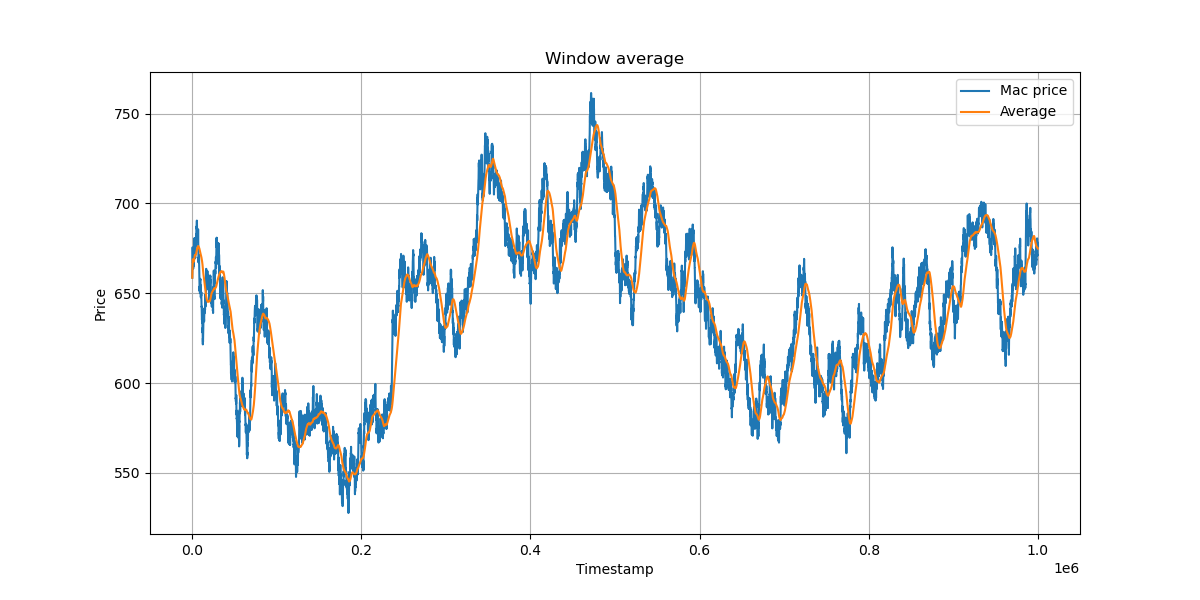

In [15]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

len_long = 100
win_lst = []
average_win = []

for i in range(len(mac_mprice)):
    win_lst.append(mac_mprice[i])

    if len(win_lst) > len_long:
        win_lst.pop(0)
    
    average_win.append(sum(win_lst)/len(win_lst))

plt.figure(figsize=(12, 6))
plt.plot(time, mac_mprice, label = 'Mac price')
plt.plot(time, average_win, label = 'Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Window average')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a histogram for residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for PB1')
plt.grid(True)
plt.show()

PB2 Intercept: -5167.784030915704
PB2 Coefficients Cro, Jam, Djem: [ 7.22257409  2.48206568 -0.87389777]
PB2 root of MSE:  44.54804410961108


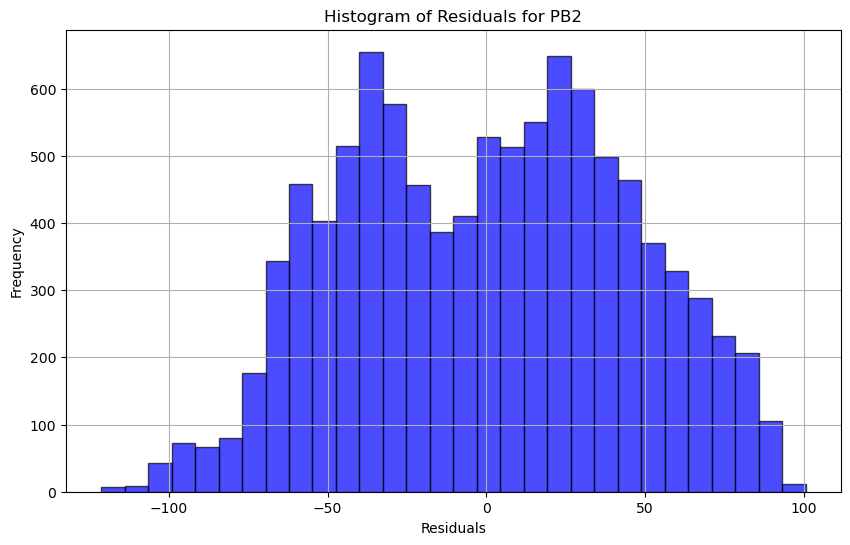

In [6]:
Vars = []
y = []
time = []

for i in range(len(cro_price)):
    Vars.append([cro_price[i],jam_price[i],djem_price[i]])
    y.append(pb2_price[i])
    time.append(time_lst[i])

X = np.array(Vars)

# Fitting the model
model.fit(X, y)

# Prediction
y_pred = model.predict(X)
#print("Predictions:", y_pred)

# Coefficients and intercept
print("PB2 Intercept:", model.intercept_)
print("PB2 Coefficients Cro, Jam, Djem:", model.coef_)

print("PB2 root of MSE: ",math.sqrt(mean_squared_error(y, y_pred)))

# Calculate residuals
residuals = [y[i] - y_pred[i] for i in range(len(y))]

# Create a histogram for residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for PB2')
plt.grid(True)
plt.show()


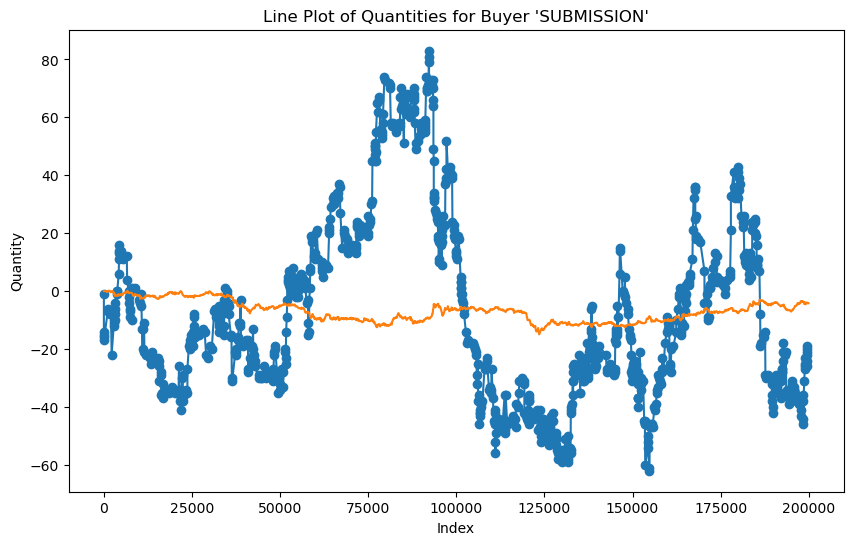

In [54]:
import json
import matplotlib.pyplot as plt

filename = "Log_kelp_ga.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
quantities = []
time_lst = []
quantity = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity += item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)
    elif item.get("seller") == "SUBMISSION":
        quantity -= item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)

# Plot the quantities as a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_lst, quantities, marker='o', linestyle='-')
plt.plot(df_kelp['timestamp'], df_kelp['profit_and_loss'])
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.title("Line Plot of Quantities for Buyer 'SUBMISSION'")
plt.show()

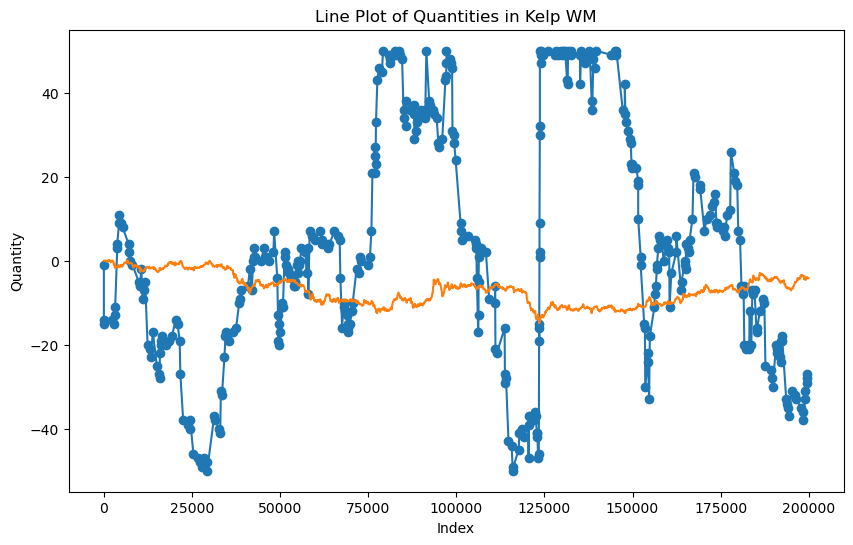

In [52]:
import json
import matplotlib.pyplot as plt

filename = "Log_kelp_wm_ga.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
quantities = []
time_lst = []
quantity = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity += item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)
    elif item.get("seller") == "SUBMISSION":
        quantity -= item.get("quantity", 0)
        quantities.append(quantity)
        timestamp = item.get("timestamp", 0)
        time_lst.append(timestamp)

# Plot the quantities as a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_lst, quantities, marker='o', linestyle='-')
plt.plot(df_kelp['timestamp'], df_kelp['profit_and_loss'])
plt.xlabel("Index")
plt.ylabel("Quantity")
plt.title("Line Plot of Quantities in Kelp WM")
plt.show()

In [15]:
from datamodel import OrderDepth, UserId, TradingState, Order

product = "KELP"
pos_limit = 50
dump_range = 30
max_profit = 1

orders = []
position = 19
sell_amount = 0

buy_quantity = 0
sell_quantity = 0

if pos_limit - dump_range <= position <= pos_limit:
    sell_amount = position
    orders.append(Order(product,round(2026) + 1,-sell_amount))
    sell_quantity += sell_amount

    print(position - sell_amount)

if -pos_limit <= position <= -pos_limit + dump_range:
    buy_amount = - position
    orders.append(Order(product,round(2026) - 1,buy_amount))
    buy_quantity += buy_amount

    print(position + buy_amount)



In [6]:
int(1.7)
round(1.4)

1